# Ensemble Methods


1. RandomForest
2. AdaBoost
3. GradientBoostingTree
4. VotingClassifier

## RandomForest

In [1]:
## Limitations of decison tree is that it overfits & shows high variance.
from sklearn.datasets import load_digits
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
X = digits.data
y = digits.target

In [5]:
trainX, testX, trainY, testY = train_test_split(X,y)


In [6]:
dt = DecisionTreeClassifier()
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [7]:
dt.score(testX,testY)


0.8333333333333334

In [8]:
rf = RandomForestClassifier()
rf.fit(trainX,trainY)

RandomForestClassifier()

In [9]:
rf.score(testX,testY)

0.9755555555555555

## AdaBoost

Boosting in general is about building a model from the training data, then creating a second model that attempts to correct the errors from the first model.Models are added until the training set is predicted perfectly or a maximum number of models are added.

In [10]:
from sklearn.ensemble import AdaBoostClassifier

#### Important Hyper-parameters

n_estimators : number of trees to be configured, larger is better but compute cost.

max_features : maximum number of features to be considered for splitting the node. For classification this equals to sqrt(n_features). And, for regression max_features = n_features.

n_jobs : Configure as -1 so that we can make use of all cores.

In [11]:
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=600)

In [12]:
ab.fit(trainX,trainY)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                   n_estimators=600)

In [13]:
ab.score(testX,testY)

0.9777777777777777

In [14]:
ab = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),n_estimators=600)

In [15]:
ab.fit(trainX,trainY)


AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),
                   n_estimators=600)

In [16]:
ab.score(testX,testY)

0.9688888888888889

 ### GradientBoostingTree
    
A machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [17]:
## Problem : House Price Prediction using GradientBoostingTree
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
house_data = load_boston()
X = house_data.data
y = house_data.target

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()
gbt

GradientBoostingRegressor()

In [20]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y)
gbt.fit(trainX,trainY)

GradientBoostingRegressor()

In [21]:
test_score = np.zeros(100, dtype=np.float64)
for i, y_pred in enumerate(gbt.staged_predict(testX)):
    test_score[i] = gbt.loss_(testY, y_pred)

Text(0, 0.5, 'Least squares Loss')

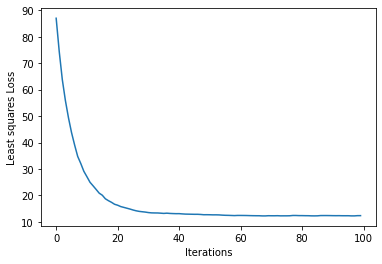

In [22]:
plt.plot(test_score)
plt.xlabel('Iterations')
plt.ylabel('Least squares Loss')

## VotingClassifier

Core concept of VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or weighted vote to predict the class labels.


In [23]:
## Problem : DIGIT identification using VotingClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [24]:
estimators = [ 
    ('rf',RandomForestClassifier(n_estimators=20)),
    ('svc',SVC(kernel='rbf', probability=True)),
    ('knc',KNeighborsClassifier()),
    ('abc',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=20)),
    ('lr',LogisticRegression()) 
]

In [25]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [26]:
digits = load_digits()
X,y = digits.data, digits.target
trainX, testX, trainY, testY = train_test_split(X,y)

In [27]:
vc.fit(trainX,trainY)

C:\Users\matin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=20)),
                             ('svc', SVC(probability=True)),
                             ('knc', KNeighborsClassifier()),
                             ('abc',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=20)),
                             ('lr', LogisticRegression())])

In [28]:
vc.score(testX,testY)

0.98

In [29]:
for est,name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(testX,testY))

rf 0.9488888888888889
svc 0.9822222222222222
knc 0.9866666666666667
abc 0.8422222222222222
lr 0.9533333333333334


In [30]:
vc = VotingClassifier(estimators=estimators, voting='soft', weights=[2,.1,3,2,2])
vc.fit(trainX,trainY)

C:\Users\matin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=20)),
                             ('svc', SVC(probability=True)),
                             ('knc', KNeighborsClassifier()),
                             ('abc',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=20)),
                             ('lr', LogisticRegression())],
                 voting='soft', weights=[2, 0.1, 3, 2, 2])

In [31]:
vc.score(testX,testY)

0.9755555555555555